## Machine Learning

### Model

Programm, das über Daten mithilfe eines Algorithmus' generiert wird. Der Algorithmus beobachtet Zusammenhänge in dem Datenset und schreibt in diese in dem Model nieder. Danach können neue Daten in das Modell hineingegeben werden um eine Vorhersage zu bekommen.

### Beispiel: Wetter Modell

4 Datenpunkte: Datum, Uhrzeit, Niederschlag %, Wolken %

Ergebnis: Grad Celsius

Input: 01.07., 12:00, 0%, 0% -> 32°

Input: 01.01., 12:00, 0%, 0% -> 10°

Vergangenheitsdaten der letzten 30 Jahre -> Training vom Modell

In das fertige Modell können neue Daten gefüttert werden und am Ende kommt eine Vorhersage heraus

### Trainingsprozess

Der Algorithmus erkennt Zusammenhänge im Datenset und berechnet daraus die Genauigkeit (Accuracy) und den Verlust (Loss) des Modells.

Am Ende dieses Prozesses werden die Ergebnisdaten wieder in das Modell zurück gefüttert -> Lernen

Ganz am Ende kommt das Model als Ergebnis heraus

## Datenset

Das MAGIC Gamma Telescope Set besteht aus Daten zu Partikeln die das Teleskop treffen. Der Rekorder zeichnet dies auf, und speichert die Daten zu den entsprechenden Partikeln mit einer Klassifizierung.

2 Partikel:
- Gamma Strahlen
- Hadronen

Mit diesem Datenset können wir ein Machine Learing Model schreiben, welches anhand der Daten selbstständig erkennt um welche Art von Partikel es sich handelt.

Beschreibung des Datensets:
- fLength: continuous # major axis of ellipse [mm]
- fWidth: continuous # minor axis of ellipse [mm]
- fSize: continuous # 10-log of sum of content of all pixels [in #phot]
- fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
- fConc1: continuous # ratio of highest pixel over fSize [ratio]
- fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
- fM3Long: continuous # 3rd root of third moment along major axis [mm]
- fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
- fAlpha: continuous # angle of major axis with vector to origin [deg]
- fDist: continuous # distance from origin to center of ellipse [mm]
- class: g,h # gamma (signal), hadron (background)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Data/MAGIC.csv")

In [18]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [19]:
df["class"].unique()  # Einzigartige Elemente in der Spalte feststellen

df["class"] == "g"

df["class"] = (df["class"] == "g").astype(int)  # Buchstaben zu Zahlen umwandeln, da Machine Learning Algorithmen nur wirklich mit Zahlen arbeiten können

In [20]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [21]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


## Abweichungen zwischen den Partikeln feststellen

Ein Histogramm eignet sich hier gut

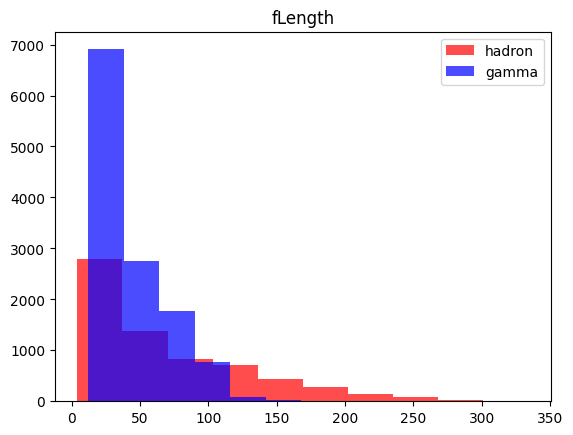

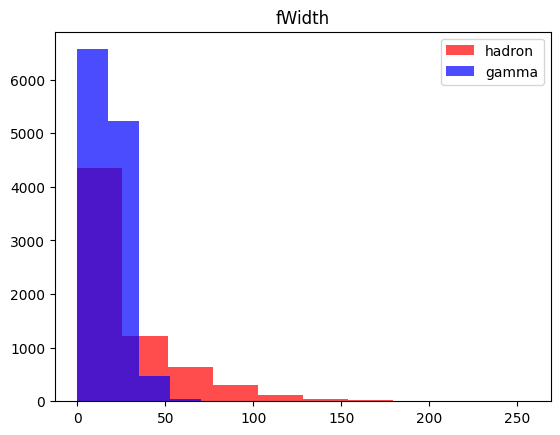

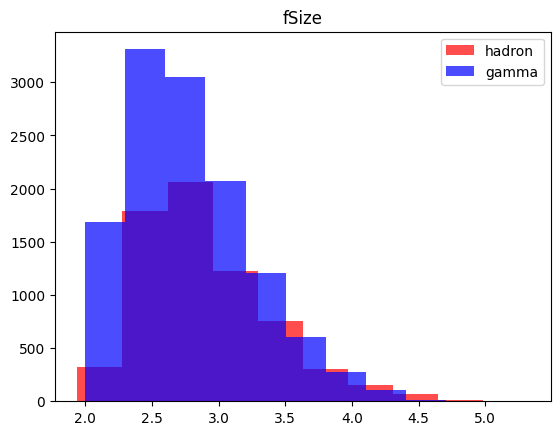

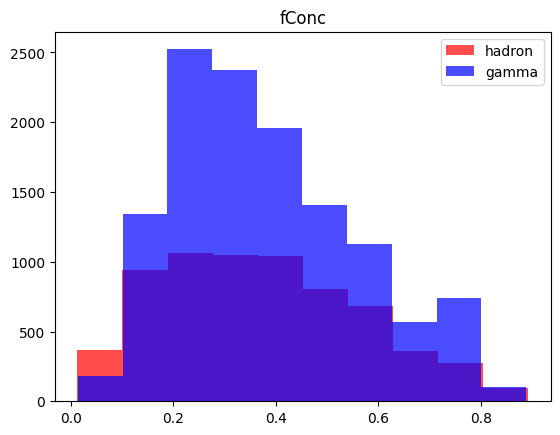

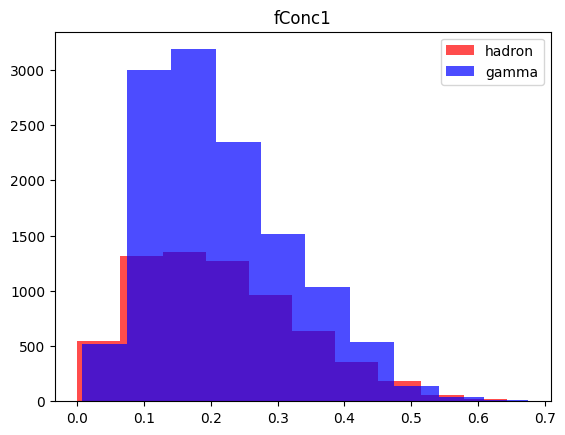

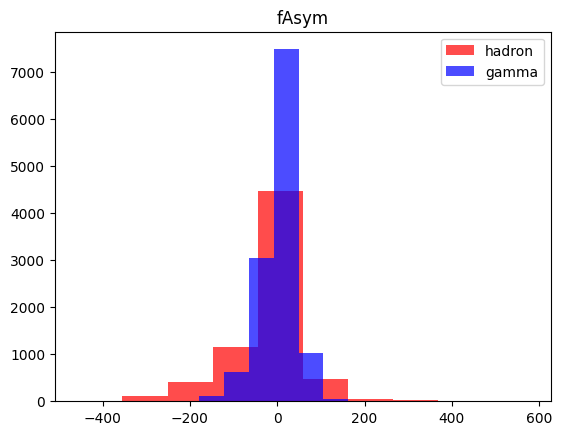

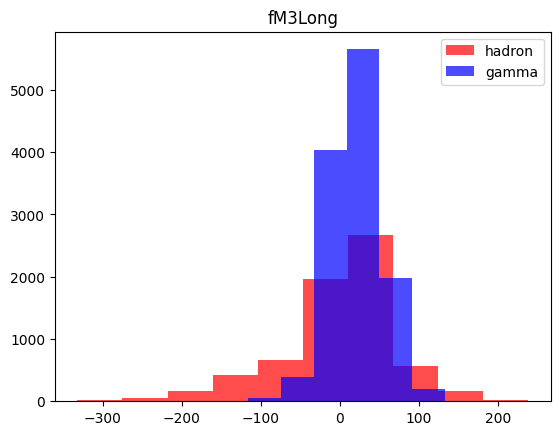

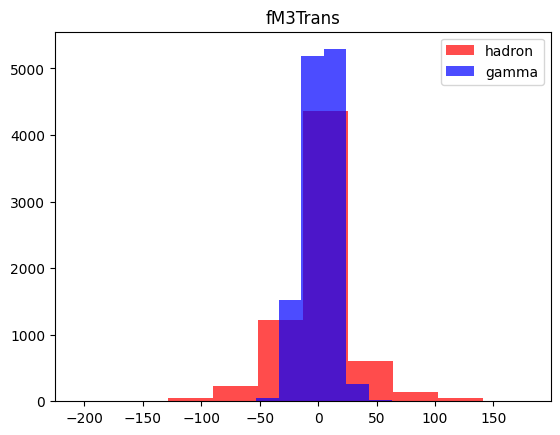

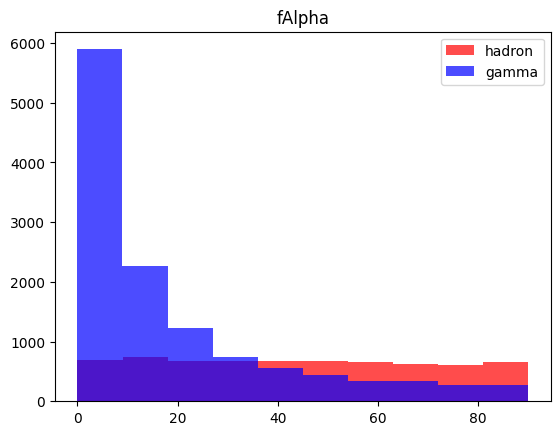

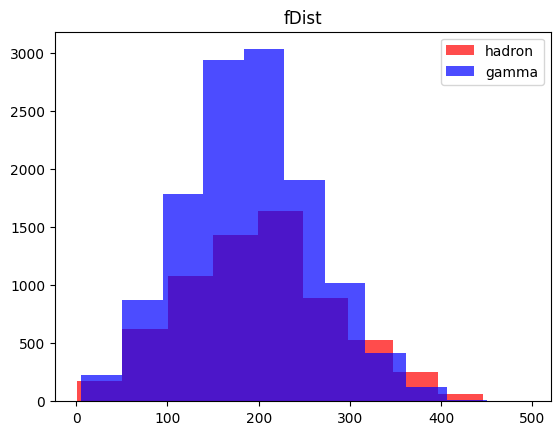

In [25]:
for column in df.columns[:-1]:
    plt.hist(df[df["class"]==0][column], color="red", label="hadron", alpha=0.7)
    plt.hist(df[df["class"]==1][column], color="blue", label="gamma", alpha=0.7)
    plt.title(column)
    plt.legend()
    plt.show()

## Trainings-, Validierungs-, Testdatensets

Wir benötigen für Machine Learning drei Datensets:
- Trainingsdaten
- Validierungsdaten
- Testdaten

Dafür können wir das Gesamtset nehmen und aufteilen

In [27]:
training, validierung, test = np.split(df.sample(frac=1), [int(len(df)*0.6), int(len(df)*0.8)])

In [31]:
len(training)

11412

In [32]:
len(validierung)

3804

In [33]:
len(test)

3804

## Standardisierung von den Trainingsdaten

Wir müssen erstmal unser Datenset standardisieren, nachdem es verstreut ist (Menge der G und H, Outlier bei den Spalten)

StandardScaler
- "Glättet" das Datenset (entfernt Outlier)
- Verkleinert große Werte zu kleineren Werten um den Prozess des Lernens zu vereinfachen

RandomOverSampler
- Generiert Zufallsdaten um eine Ungleichheit der Daten auszugleichen
- Algorithmus kann besser lernen wenn die Daten gleichmäßig sind

LabelEncoder
- Ermöglicht das Umwandeln von Texten in einem Datenset zu numerischen Werten
- Machine Learning Algorithmen können nicht mit Texten umgehen
  

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [40]:
dataToScale = training[training.columns[:-1]].values
dataToScale  # Vor Skalierung
dataToScale = scaler.fit_transform(dataToScale)
dataToScale  # Nach Skalierung

array([[-0.76473577, -0.60400095, -1.24723236, ..., -0.15652274,
         2.33736367, -2.10893917],
       [-0.53286387, -0.23317801, -0.05637748, ..., -0.32236448,
         1.45815765, -1.97928141],
       [ 1.21810703,  0.94122062,  2.21640105, ..., -1.18035456,
        -1.016717  ,  1.61414563],
       ...,
       [-0.94688794, -0.6069649 , -1.38360752, ..., -0.46513509,
         1.23762419, -1.26914977],
       [-0.67724567, -0.56542103, -0.40913736, ..., -0.30968303,
         0.98874371, -0.17841357],
       [-0.80293594, -0.71772157, -0.97807087, ..., -0.50765751,
         0.15260814, -0.54576677]])

Die Menge der Daten ist uneben

In [42]:
len(training[training["class"] == 1])

7398

In [43]:
len(training[training["class"] == 0])

4014

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
sampler = RandomOverSampler()

In [47]:
x, y = sampler.fit_resample(dataToScale, training[training.columns[-1]])

In [56]:
data = np.hstack((x, np.array(y).reshape(-1, 1)))

In [57]:
data

array([[-0.76473577, -0.60400095, -1.24723236, ...,  2.33736367,
        -2.10893917,  1.        ],
       [-0.53286387, -0.23317801, -0.05637748, ...,  1.45815765,
        -1.97928141,  1.        ],
       [ 1.21810703,  0.94122062,  2.21640105, ..., -1.016717  ,
         1.61414563,  1.        ],
       ...,
       [ 1.7048191 ,  3.48851608,  1.09774478, ...,  2.31982354,
         0.73289047,  0.        ],
       [-0.04277008, -0.24950942, -0.47774716, ..., -0.06970347,
        -1.58362302,  0.        ],
       [ 0.17574499,  0.68492272,  0.46949019, ..., -1.03839977,
         1.28922349,  0.        ]])

In [64]:
len(data[data[:, -1] == 0])

7398

In [65]:
len(data[data[:, -1] == 1])

7398

Es macht Sinn hier jetzt eine Funktion anzulegen um unsere Teildatensets zu skalieren

In [61]:
def scale_dataset(data, oversample=False):
    left = data[data.columns[:-1]].values
    right  = data[data.columns[-1]].values

    scaler = StandardScaler()
    left = scaler.fit_transform(left)

    if oversample:
        sampler = RandomOverSampler()
        left, right = sampler.fit_resample(left, right)

    data = np.hstack((left, np.array(right).reshape(-1, 1)))
    return data, left, right

In [66]:
training, left_train, right_train = scale_dataset(training, True)
validierung, left_valid, right_valid = scale_dataset(validierung, False)
test, left_test, right_test = scale_dataset(test, False)

## Verschiedene Modelle

kNN (k-nearest neighbors):
- Beispiel: Anz. Kinder, hat X/hat nicht X
- Punkte werden auf einem Koordinatensystem
- Jeder Punkt hat eine Position
- Unbekannte Punkte sollen jetzt klassifiziert werden
- Bekannte Punkte haben bereits eine Klassifikation und stellen dadurch die Nachbarn dar
- Bei Unbekannten Punkten können wir die Distanz zu den Nachbarn messen und dadurch den Punkt klassifizieren
- K-Wert: Anzahl der benötigten Nachbarn, muss ungerade sein (3, 5, 7, ...)
- Mehrere Dimensionen möglich

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [72]:
knn_model.fit(left_train, right_train)  # left_train und right_train auf das Modell anpassen, Daten ohne Class und Daten mit Class separat

KNeighborsClassifier()

In [71]:
right_pred = knn_model.predict(left_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(right_test, right_pred))
# Precision, Recall: Menge der Korrekten/Inkorrenten Punkte
# f1-Score: Kombination von den beiden obigen Werten
# Accuracy: Genauigkeit des Modells

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1335
           1       0.85      0.86      0.86      2469

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Genauigkeit per Hand prüfen

In [76]:
def showPrediction(left_test, right_test, right_pred):
    data = pd.DataFrame(left_test)
    data["Actual"] = right_test
    data["Prediction"] = right_pred
    return data

In [78]:
accuracy = showPrediction(left_test, right_test, right_pred)

In [86]:
eval = (accuracy["Actual"] == accuracy["Prediction"]).value_counts()

In [87]:
eval[0] / len(accuracy)

0.8123028391167192

In [88]:
eval[1] / len(accuracy)

0.18769716088328076

## Naive Bayes
- Klassifizierung findet über Wahrscheinlichkeiten statt
- Bei jeder Zeile wird eine Wahrscheinlichkeit für Ja/Nein festgelegt
- Wenn die Wahrscheinlichkeit von einem neuen Datensatz 50% überschreitet ist es ein Ja, sonst Nein

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
nb_model = GaussianNB()

In [91]:
nb_model.fit(left_train, right_train)

GaussianNB()

In [92]:
right_pred = nb_model.predict(left_test)

In [95]:
print(classification_report(right_test, right_pred))
# Schneller als kNN bei großen Datensets

              precision    recall  f1-score   support

           0       0.67      0.38      0.49      1335
           1       0.73      0.90      0.81      2469

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



## Logistische Regression

Die Datenpunkte werden anhand von Wahrscheinlichkeiten auf einer bestimmten Höhe positioniert.

Wenn ein Datenpunkt über einem Schwellwert ist, wird dieser als X Klasifiziert, sonst Y

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr_model = LogisticRegression()
lr_model.fit(left_train, right_train)

LogisticRegression()

In [99]:
right_pred = lr_model.predict(left_test)

In [100]:
print(classification_report(right_test, right_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1335
           1       0.84      0.82      0.83      2469

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## Support Vector Machines

Platziert den Vektor möglichst weit weg zwischen den Datenpunkten und breitet dann ein Margin aus

Alle Datenpunkte auf einer Seite werden mit X Klassifiziert, alle anderen Datenpunkte mit Y

Danach wird dieser Prozess wiederholt

In [102]:
from sklearn.svm import SVC

In [103]:
svm_model = SVC()

In [104]:
svm_model.fit(left_train, right_train)

SVC()

In [106]:
right_pred = svm_model.predict(left_test)

In [107]:
print(classification_report(right_test, right_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1335
           1       0.88      0.91      0.89      2469

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neurales Netzwerk
- Beliebig viele Inputs werden genommen und auf die Neuronen angewandt
- Das Neuron hat eine Activation Function, diese erzeugt einen Output wenn sie angesprochen wird
- Die Outputs von allen Neuronen einer Ebene werden weitergegeben zur nächsten Ebene
- Drei Arten von Layern
    - Input Layer: Daten in roher Form
    - Hidden Layer: Berechnungen finden hier statt
    - Output Layer: Hier kommt die Prediction heraus
- Der Output geht danach wieder zurück in das Modell
- Am Anfang wird das Modell inakkurat sein und über Zeit wird es sich verbessern
    - Erhöhung der Accuracy
    - Verringerung des Losses

Wir können jetzt ein eigenes Modell erstellen
- Neuron: nimmt mehrere Daten auf und gibt über die Activation Function einen Output aus. Bei einem Neural Net werden diese Neuronen miteinander verbunden und geben dadurch ihre Outputs aneinander weiter
- Activation Function: Erlaubt dem Neural Net, Zusammenhänge der Daten zu finden. Die Funktion normalisiert die Daten und danach wird geprüft, welche Datenpunkte zusammenhängen
- Beliebt ReLU und Sigmoid
    - Rectified Linear Unit: Günstige Funktion (Rechenaufwand), eignet sich dadurch für Machine Learning
    - Sigmoid: Gibt immer einen Wert zwischen 0 und 1 zurück, eignet sich daher für das letzte Neuron (Output)
- (Optional) Dropout: Ermöglicht, eine bestimmte Prozentzahl der Neuronen wegzuwerfen um Overfitting zu verhindern (Anpassung des Modells auf die Daten wird zu stark, dadurch wird das Modell zu "starr")
- (Optional) Optimizer: Ermöglicht das Verstärken des Trainings bei schwach ausgeprägten Teilen des Modells, und umgekehrt. Hierbei wird auch eine Lernrate angegeben, die die Stärke des Optimizers angibt
    - Adam, Adaptive Moment Estimation: Beliebt für Machine Learning

In [110]:
import tensorflow as tf

In [114]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),  # 10 = Anzahl der Spalten
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                352       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
history = model.fit(left_train, right_train,
          epochs=100,  # Anzahl Durchläufe -> Wir oft kommen wir Links rein und rechts raus
          batch_size=16,  # Anzahl Parallelisierungen
          verbose=1)  # Output des Trainings

Epoch 1/100
925/925 [==============================] - 5s 4ms/step - loss: 0.4934 - accuracy: 0.7592
Epoch 2/100
925/925 [==============================] - 4s 5ms/step - loss: 0.4300 - accuracy: 0.7950
Epoch 3/100
925/925 [==============================] - 4s 5ms/step - loss: 0.4154 - accuracy: 0.8099
Epoch 4/100
925/925 [==============================] - 4s 4ms/step - loss: 0.4000 - accuracy: 0.8168
Epoch 5/100
925/925 [==============================] - 4s 4ms/step - loss: 0.3917 - accuracy: 0.8211
Epoch 6/100
925/925 [==============================] - 4s 4ms/step - loss: 0.3836 - accuracy: 0.8271
Epoch 7/100
925/925 [==============================] - 4s 4ms/step - loss: 0.3790 - accuracy: 0.8327
Epoch 8/100
925/925 [==============================] - 4s 4ms/step - loss: 0.3731 - accuracy: 0.8330
Epoch 9/100
925/925 [==============================] - 4s 4ms/step - loss: 0.3678 - accuracy: 0.8366
Epoch 10/100
925/925 [==============================] - 4s 4ms/step - loss: 0.3646 - accura

## Modelle speichern und laden
model.save("Test.keras")

model = tf.keras.saving.load_model("Name)

In [119]:
right_pred = model.predict(left_test)

119/119 [==============================] - 0s 2ms/step


In [120]:
(right_pred >= 0.5)

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [121]:
def showPredictionNN(left_test, right_test, right_pred):
    data = pd.DataFrame(left_test)
    data["Actual"] = right_test
    data["Prediction"] = (right_pred >= 0.5).astype(int)
    return data

In [122]:
accuracy = showPredictionNN(left_test, right_test, right_pred)

In [123]:
eval = (accuracy["Actual"] == accuracy["Prediction"]).value_counts()

In [125]:
eval

True     3324
False     480
Name: count, dtype: int64

In [126]:
eval[0] / len(accuracy)

0.8738170347003155

In [127]:
eval[1] / len(accuracy)

0.12618296529968454

Validation Data: Während dem Training die Tests mitmachen

In [131]:
history = model.fit(left_train, right_train,
          epochs=20,
          batch_size=16,
          validation_data=left_valid,  # Validation Data kann hier übergeben werden
          verbose=1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

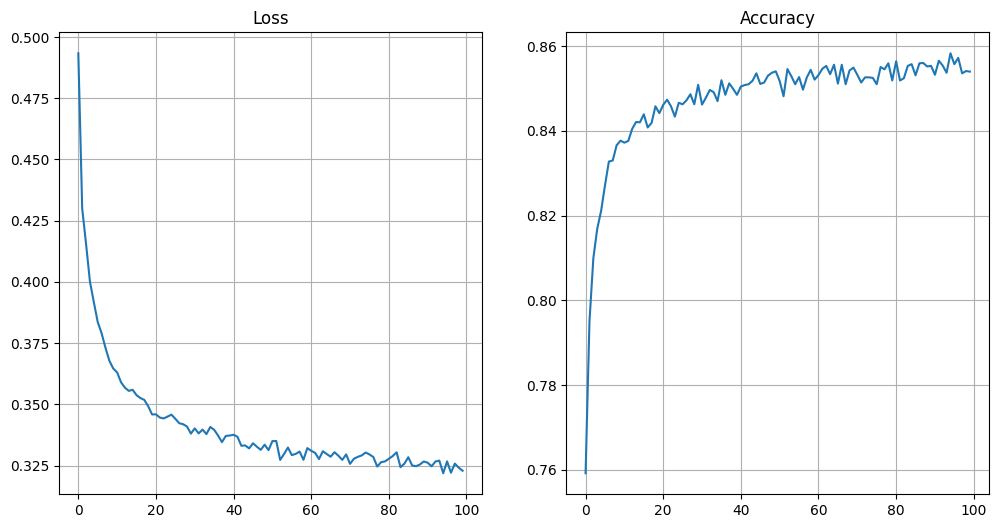

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history["loss"])
ax1.set_title("Loss")
ax1.grid(True)

ax2.plot(history.history["accuracy"])
ax2.set_title("Accuracy")
ax2.grid(True)